In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Titanin_train.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [8]:
x_train.head(2)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0


In [12]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]= x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]= x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [13]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,2.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


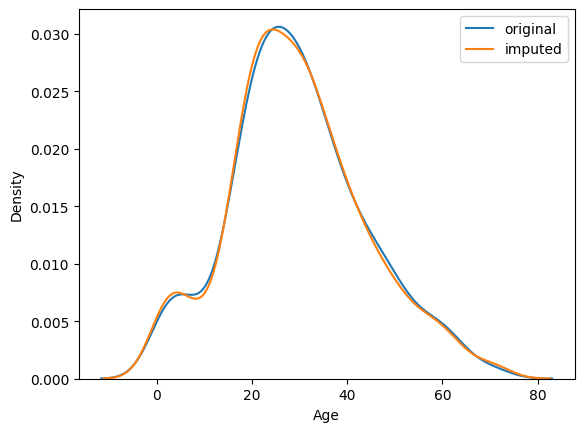

In [17]:
sns.kdeplot(x_train['Age'],label='original')
sns.kdeplot(x_train['Age_imputed'],label='imputed')

plt.legend()
plt.show()

In [19]:
x_train['Age'].var()

204.34951339046142

In [20]:
x_train['Age_imputed'].var()

206.58018992714798

In [21]:
data = pd.read_csv("C:\\Users\\sanja\\Downloads\\100-days-of-machine-learning-main\\day38-missing-indicator\\house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [22]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [23]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [24]:
x = data
y = data['SalePrice']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [26]:
x_train['garage_imputed'] = x_train['GarageQual']
x_test['garage_imputed'] = x_test['GarageQual']

x_train['fireplace_imputed'] = x_train['FireplaceQu']
x_test['fireplace_imputed'] = x_test['FireplaceQu']

In [28]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,garage_imputed,fireplace_imputed
254,NaN,TA,145000,TA,NaN
270,Gd,TA,266000,TA,Gd
769,Gd,TA,538000,TA,Gd
471,Gd,TA,190000,TA,Gd
715,TA,TA,165000,TA,TA
